<a href="https://colab.research.google.com/github/TwoManyHands/Algorithms/blob/main/bank_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Imports

In [59]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [60]:
import pandas as pd
import numpy as np
import altair as alt
from sklearn.model_selection import train_test_split

bankData=pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Chapter3/bank-full.csv',sep=';')

# Employment Propensity

In [61]:
jobTot=bankData.groupby('job')['y'].agg(jobTot='count').reset_index()
jobTot

,job,jobTot
0,admin.,5171
1,blue-collar,9732
2,entrepreneur,1487
3,housemaid,1240
4,management,9458
5,retired,2264
6,self-employed,1579
7,services,4154
8,student,938
9,technician,7597


In [62]:
jobProp=bankData.groupby(['job','y'])['y'].agg(jobCat='count').reset_index()
jobProp.head(2)

,job,y,jobCat
0,admin.,no,4540
1,admin.,yes,631


# Merge the two dataframes

In [63]:
jobComb=pd.merge(jobProp,jobTot,on=['job'])
jobComb['catProp']=(jobComb.jobCat/jobComb.jobTot)*100
jobComb.head(3)

,job,y,jobCat,jobTot,catProp
0,admin.,no,4540,5171,87.797331
1,admin.,yes,631,5171,12.202669
2,blue-collar,no,9024,9732,92.725031


In [64]:
#jobProp.head(3)
#jobTot.head(3)

# Use Matplotlib to visualise the job status propensity to buy

In [65]:
import matplotlib.pyplot as plt
import numpy as np

In [76]:
#create seperate dataframes for yes and no
jobCombYes=jobComb[jobComb['y']=='yes']
jobCombNo=jobComb[jobComb['y']=='no']
#get the length of the xaxis labels
xlabels=jobTot['job'].nunique()
#get the propoortion values
jobYes=jobCombYes['catProp'].unique()
jobNo=jobCombNo['catProp'].unique()

In [79]:
jobNo

array([87.79733127, 92.72503083, 91.72831204, 91.20967742, 86.24444914,
       77.20848057, 88.15706143, 91.11699567, 71.32196162, 88.94300382,
       84.49731389, 88.19444444])

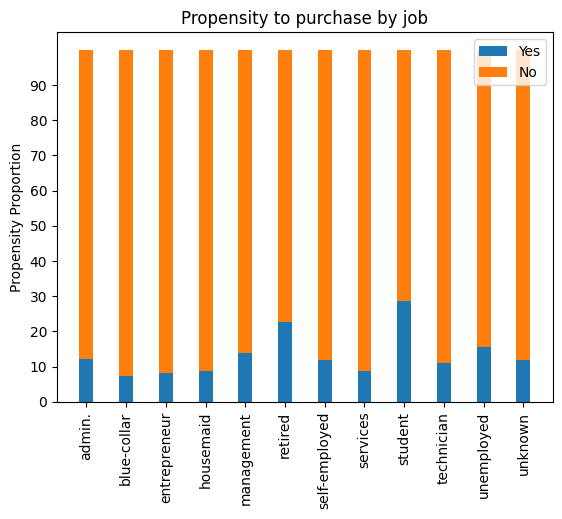

In [85]:
#arrange the indexes of x asix
ind=np.arange(xlabels)
#get the width of each bar
width=0.35
#get the plots
p1=plt.bar(ind,jobYes,width)
p2=plt.bar(ind,jobNo,width,bottom=jobYes)
#labels and title
plt.ylabel('Propensity Proportion')
plt.title('Propensity to purchase by job')
plt.xticks(ind,jobTot['job'].unique())
plt.yticks((np.arange(0,100,10)))
plt.legend((p1[0],p2[0]),('Yes','No'))
plt.xticks(rotation=90)
plt.show()

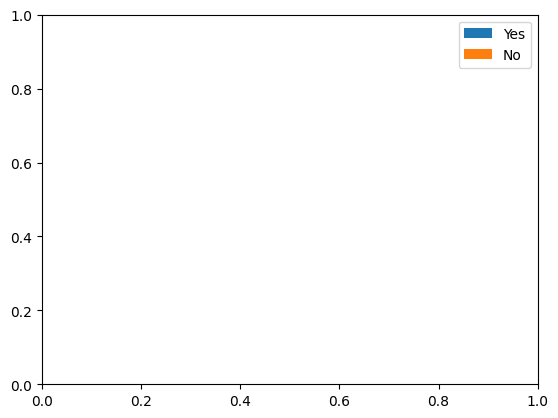

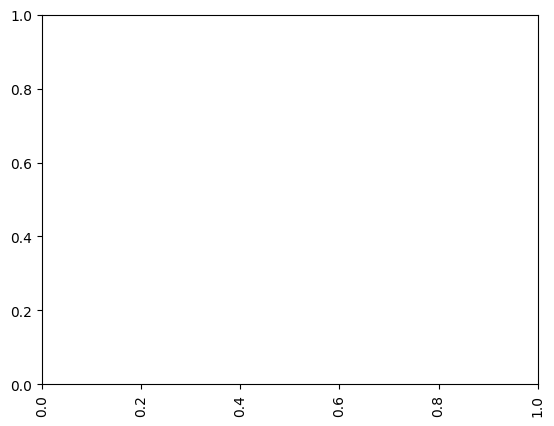